In [1]:
from numpy import *
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from numpy import linalg as la
import pdb
%matplotlib inline

### Reading dataset

In [2]:
rr = pd.read_json('renttherunway_final_data.json',lines=True)
print(shape(rr))
rr.head(5)

# category_list = ['gown','jacket']
# rr = rr[rr['category'].isin(category_list)]

(192544, 15)


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


##### Validating missing values

In [3]:
rr.isna().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

As can be seen in the above cell, values are missing for bust size, weight, rating, rented for, bdy type, height and age.

##### Datatype and Not null records

In [4]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
fit               192544 non-null object
user_id           192544 non-null int64
bust size         174133 non-null object
item_id           192544 non-null int64
weight            162562 non-null object
rating            192462 non-null float64
rented for        192534 non-null object
review_text       192544 non-null object
body type         177907 non-null object
review_summary    192544 non-null object
category          192544 non-null object
height            191867 non-null object
size              192544 non-null int64
age               191584 non-null float64
review_date       192544 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


The above cell shows us the data type associated with each column. The cell also shows us the not null values for each column.

In [5]:
def inches(data):
    extract = data.str.extractall("(\d+)").reset_index()
    #https://www.geeksforgeeks.org/python-pandas-series-str-extractall/
    ft = extract["match"] == 0
    inches = extract["match"] == 1
    #https://intellipaat.com/community/50024/text-manipulation-within-a-dataframe-words-extraction
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
    feet_conversion = extract[ft].drop(["level_0", "match"], axis=1).reset_index(drop=True).apply(pd.to_numeric) * 12
    inch_conversion = extract[inches].drop(["level_0", "match"], axis=1).reset_index(drop=True).apply(pd.to_numeric)
    height_inches = feet_conversion[0] + inch_conversion[0]
    return height_inches

### Distribution of Numberical Variables

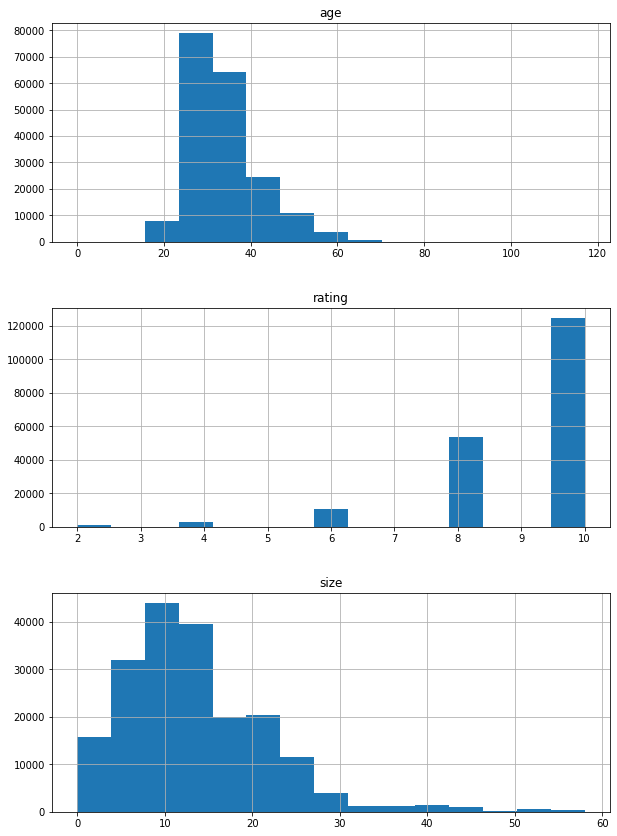

In [6]:
numerical = ['weight','rating', 'height', 'size', 'age']

#rr["height"] = inches(rr["height"])

rr["weight"] = rr["weight"].str.extract("(\d+)", expand=True)
#https://www.geeksforgeeks.org/python-pandas-series-str-extract/

rr[numerical].hist(bins=15, figsize=(10, 25), layout=(5, 1));

The above histogram shows us the frequency of a variable.

Age: Most of the users are between 25 - 40

Height: Majority users have their height between 62 and 67 inches

Rating: Looks like most of the users are happy with the items. We see most of the users have rated above 8.

Size: The size of the items is mostly skewed towards left having most of the values below 20.

In [7]:
categorical = ['fit', 'bust size','rented for','body type', 'category']

### Barplot of Categorical Variables

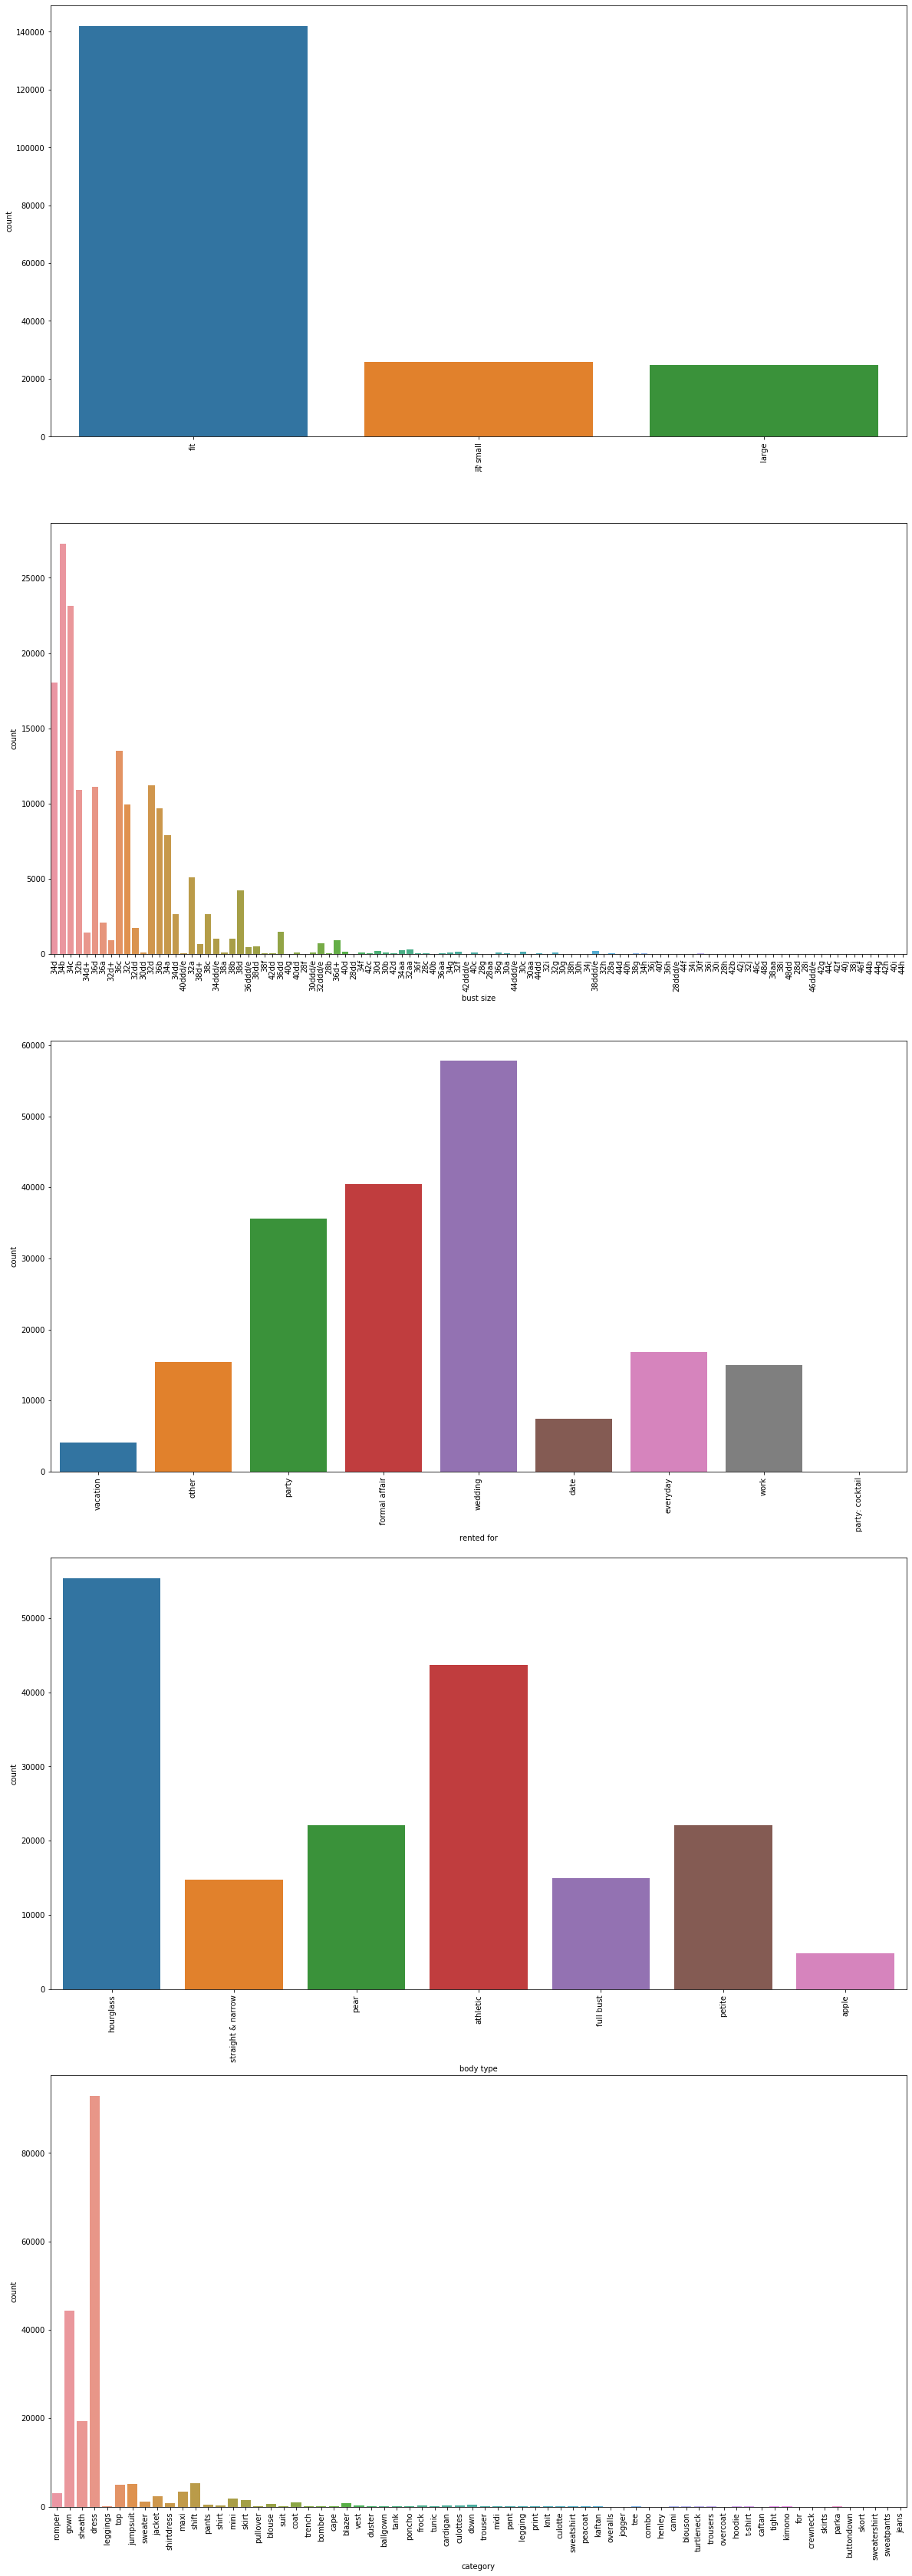

In [8]:
categorical = ['fit', 'bust size','rented for','body type', 'category']
#rr[categorical].hist(bins=15, figsize=(15, 6), layout=(2, 4));
import seaborn as sns

#https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d



fig, ax = plt.subplots(5,1, figsize=(20, 60))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(rr[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

The above plot highlights the count of records with each categorical variables.

Fit: Fit category has the maximum count.

Bust Size: Most of the sizes are around 34

Rented for: Most of the users have rented items for Wedding, Formal Affair and Party

Body Type: Hourglass and athletic have the maximum count of records.

Catgegory: Dress and gown are the first and second most count of items.

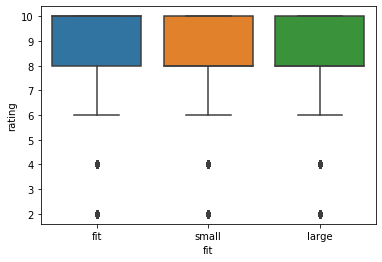

In [9]:
sns.boxplot(x=rr['fit'], y=rr['rating'])

AxesSubplot(0.125,0.125;0.775x0.755)


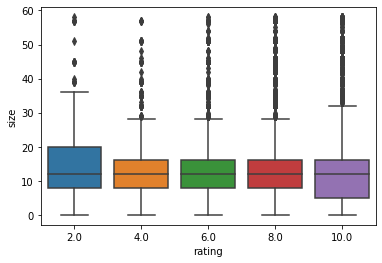

In [10]:
print(sns.boxplot(rr['rating'], rr['size']))

AxesSubplot(0.125,0.125;0.775x0.755)


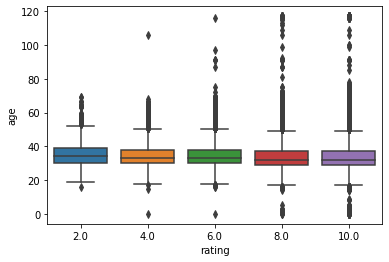

In [11]:
print(sns.boxplot(rr['rating'], rr['age']))

### Matrix Sparsity

In [12]:
cleaned_line = rr[['user_id', 'item_id', 'rating']] # Get rid of unnecessary info
grouped_cleaned = cleaned_line.groupby(['user_id', 'item_id']).sum().reset_index() # Group together
grouped_cleaned.rating.loc[grouped_cleaned.rating == 0] = 1 # Replace a sum of zero purchases with a one to
# indicate purchased
grouped_purchased = grouped_cleaned.query('rating > 0')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


If we look at our final resulting matrix of grouped purchases, we see the following:

In [13]:
grouped_purchased.head()

,user_id,item_id,rating
0,9,168592,10.0
1,9,227716,10.0
2,25,2064568,10.0
3,35,1323121,10.0
4,35,1584916,10.0


In [14]:
from pandas.api.types import CategoricalDtype

import scipy.sparse as sparse
users = list(np.sort(grouped_purchased.user_id.unique())) # Get our unique customers
items = list(grouped_purchased.item_id.unique()) # Get our unique products that were purchased
rating = list(grouped_purchased.rating) # All of our purchases

rows = grouped_purchased.user_id.astype(CategoricalDtype(categories = users)).cat.codes 
# Get the associated row indices
cols = grouped_purchased.item_id.astype(CategoricalDtype(categories = items)).cat.codes 
# Get the associated column indices
purchases_sparse = sparse.csr_matrix((rating, (rows, cols)), shape=(len(users), len(items)))

In [15]:
purchases_sparse

<105571x5850 sparse matrix of type '<class 'numpy.float64'>'
	with 192278 stored elements in Compressed Sparse Row format>

We have 105571 users with 5850 items. For these user/item interactions, 192278  of these items had a purchase. In terms of sparsity of the matrix, that makes:

In [16]:
matrix_size = purchases_sparse.shape[0]*purchases_sparse.shape[1] # Number of possible interactions in the matrix
num_purchases = len(purchases_sparse.nonzero()[0]) # Number of items interacted with
sparsity = 100*(1 - (num_purchases/matrix_size))
sparsity

99.96886641768286

99.97% of the interaction matrix is sparse.